# Predictive Modeling of Hospital Length of Stay and Discharge Type
# [Step 4: Explore merged data set]

## 1. Import libraries and load dataset

In [1]:
# Import data manipulation library
import pandas as pd
import numpy as np
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set data path 
merged_data_path = "/home/anna/Desktop/Master_thesis/output_data/merged_data_otl"  

# Load merged dataset
merged_data = pd.read_csv(merged_data_path)

In [3]:
merged_data.head()

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category,ALAT,AP,...,NEUm#n,NRBCmn,Na,QUHD,Quicks,RDWn,THZn,TNThsn,UREA,tHb
0,1,171465,Entlassung,f,73,28,A04.70,Infectious diseases,10.0,NaN,...,NaN,0.0,138.0,57.8,13.2,18.3,165.0,NaN,NaN,NaN
1,1,333396,Entlassung,f,73,34,K57.22,Digestive diseases,19.0,93.0,...,18.85,0.0,137.0,77.0,11.6,18.8,93.0,NaN,NaN,NaN
2,2,27091,Entlassung,m,51,13,T84.5,Injury & poisoning,NaN,NaN,...,NaN,0.0,136.0,55.8,14.0,18.9,164.0,NaN,NaN,NaN
3,2,36154,Entl.ext.Instit,m,50,12,I21.4,Circulatory diseases,38.0,58.0,...,NaN,0.1,138.0,66.0,12.7,14.4,131.0,367.0,4.5,NaN
4,2,142617,Entl. in ex.KH,m,51,1,T84.5,Injury & poisoning,15.0,65.0,...,7.15,NaN,136.0,35.2,19.2,17.6,159.0,NaN,5.2,NaN


## 2. General statistics

### 2.1 Age and sex

Overall, the data suggests that males in the dataset tend to be slightly older than females on average, with a higher median age. Additionally, while females show more age variability, males have a more concentrated age distribution. Both sexes have patients ranging from 18 to over 100 years old, indicating a wide age range in both groups.

In [4]:
print(f"Summary statistics for the entire dataset:")
display(merged_data['age'].describe())

print(f"\nSummary statistics for age, separated by sex:")
display(merged_data.groupby('sex')['age'].describe())

Summary statistics for the entire dataset:


count    268781.000000
mean         62.616041
std          18.677182
min          18.000000
25%          51.000000
50%          66.000000
75%          77.000000
max         108.000000
Name: age, dtype: float64


Summary statistics for age, separated by sex:


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
f,124908.0,61.069547,20.588314,18.0,43.0,65.0,78.0,108.0
m,143873.0,63.958679,16.727546,18.0,54.0,67.0,76.0,106.0


In [5]:
sex_counts = merged_data['sex'].value_counts()

# Calculate the percentage
sex_percentage = (sex_counts / sex_counts.sum()) * 100

# Print the results
print(f"Number of Women: {sex_counts.get('f', 0)}")
print("Percentage of Women: {:.2f}%".format(sex_percentage.get('f', 0)))

print(f"\nNumber of Men: {sex_counts.get('m', 0)}")
print("Percentage of Men: {:.2f}%".format(sex_percentage.get('m', 0)))

Number of Women: 124908
Percentage of Women: 46.47%

Number of Men: 143873
Percentage of Men: 53.53%


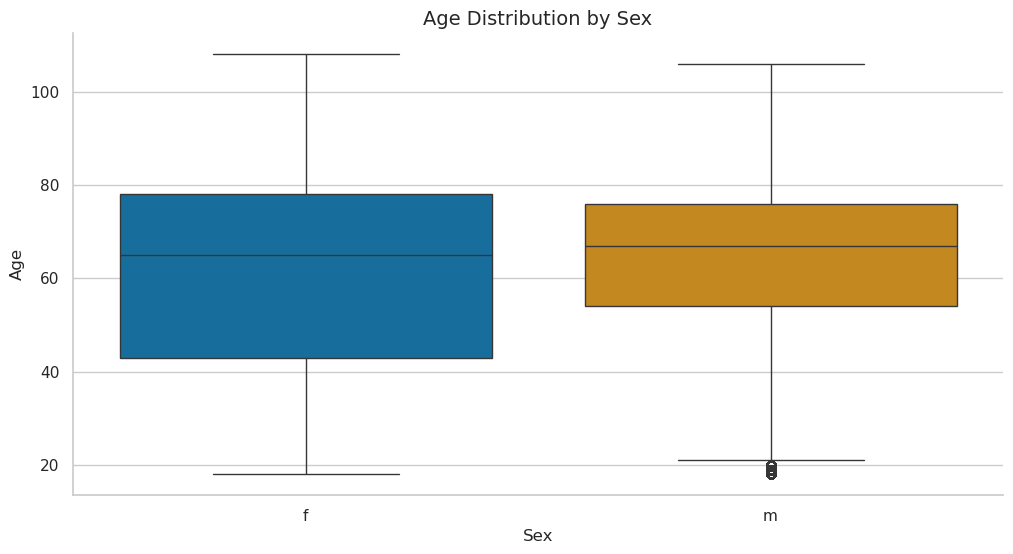

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="sex", y="age", data=merged_data, hue="sex", palette="colorblind")
sns.despine()
plt.xlabel("Sex", fontsize=12, fontweight="normal")
plt.ylabel("Age", fontsize=12, fontweight="normal")
plt.title("Age Distribution by Sex", fontsize=14, fontweight="medium")
plt.show()

### 2.2 Patients and cases

In [7]:
print(f"Number of unique patients: {merged_data['patient_id'].nunique()}\n")

print(f"Number of unique cases: {merged_data['case_id'].nunique()}")

Number of unique patients: 151255

Number of unique cases: 268781


The majority of patients have at most two hospital visits, with **2** visits considered as separate cases if they are more than 15 days apart.

Out of all patients, **24,752** have more than two cases, which represents **16.35%** of the total patient population.

In [8]:
# Count the number of cases per patient
case_counts = merged_data.groupby('patient_id')['case_id'].nunique()

case_counts.describe()

count    151255.000000
mean          1.777006
std           1.686525
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          47.000000
Name: case_id, dtype: float64

In [9]:
# Filter the patients with more than 2 cases
patients_with_more_than_2_cases = case_counts[case_counts > 2]

# Get the number of such patients
num_patients_more_than_2 = patients_with_more_than_2_cases.count()

# Get the total number of patients
total_patients = case_counts.count()

# Calculate the percentage of patients with more than 2 cases
percentage_patients_more_than_2 = (num_patients_more_than_2 / total_patients) * 100

# Print the results
print(f"Number of patients with more than 2 cases: {num_patients_more_than_2}")
print(f"Percentage of patients with more than 2 cases: {percentage_patients_more_than_2:.2f}%")

Number of patients with more than 2 cases: 24741
Percentage of patients with more than 2 cases: 16.36%


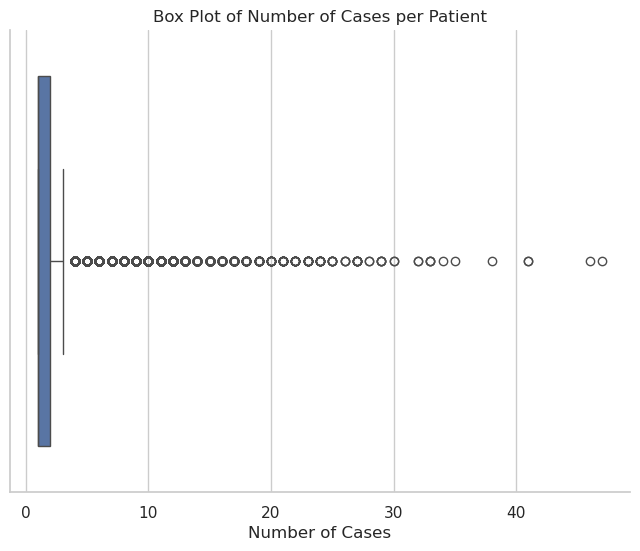

In [10]:
# Box plot for number of cases per patient
plt.figure(figsize=(8, 6))
sns.boxplot(x=case_counts)
# Remove top and right spines
sns.despine()
plt.title('Box Plot of Number of Cases per Patient')
plt.xlabel('Number of Cases')
plt.show()

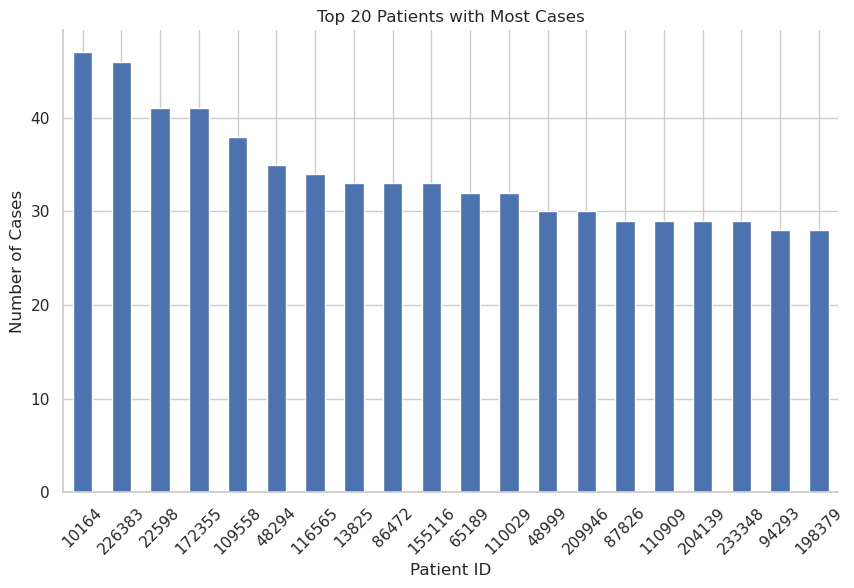

In [11]:
# Get the top n patients with the most cases
n = 20 # Define number of top n patients
top_n_patients = case_counts.nlargest(n)

# Bar plot for top N patients
plt.figure(figsize=(10, 6))
top_n_patients.plot(kind='bar')
sns.despine()
plt.title(f'Top {n} Patients with Most Cases')
plt.xlabel('Patient ID')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Display the patient with the highest number of cases
merged_data[(merged_data['patient_id'] == 10164)].sort_values(by='age')

,patient_id,case_id,discharge_type,sex,age,length_of_stay_days,diagnosis,diagnosis_category,ALAT,AP,...,NEUm#n,NRBCmn,Na,QUHD,Quicks,RDWn,THZn,TNThsn,UREA,tHb
10753,10164,4059,Entlassung,m,60,17,D59.1,Blood & immune disorders,23.0,79.0,...,3.62,0.0,141.0,83.4,NaN,19.7,200.0,33.56,7.5,NaN
10795,10164,335009,Entlassung,m,60,4,J18.8,Respiratory diseases,89.0,68.0,...,5.44,0.0,140.0,89.7,NaN,18.4,208.0,NaN,7.2,144.0
10791,10164,319876,Entlassung,m,60,12,D59.0,Blood & immune disorders,14.0,74.0,...,2.89,0.4,136.0,76.0,NaN,18.6,255.0,NaN,7.3,129.0
10784,10164,272768,Entlassung,m,60,5,R50.80,Symptoms & abnormal findings,30.0,62.0,...,8.46,0.9,138.0,87.5,NaN,20.6,163.0,35.28,8.4,115.0
10779,10164,260545,Entlassung,m,60,9,J18.8,Respiratory diseases,26.0,71.0,...,4.63,0.0,134.0,83.4,NaN,19.3,213.0,23.82,7.9,NaN
10760,10164,77986,Entlassung,m,60,1,J44.81,Respiratory diseases,32.0,78.0,...,3.62,0.0,143.0,94.7,NaN,18.2,211.0,NaN,8.2,NaN
10776,10164,239583,Entlassung,m,60,4,J44.01,Respiratory diseases,24.0,74.0,...,2.34,0.0,140.0,87.5,NaN,17.7,259.0,19.84,5.4,NaN
10759,10164,77298,Entlassung,m,60,7,M05.80,Musculoskeletal diseases,36.0,81.0,...,4.07,0.5,142.0,94.2,NaN,19.6,224.0,NaN,10.1,NaN
10757,10164,47245,Entlassung,m,61,5,J44.01,Respiratory diseases,16.0,53.0,...,3.48,0.5,135.0,81.5,NaN,19.0,206.0,NaN,5.0,100.0
10775,10164,217298,Entlassung,m,61,5,M05.99,Musculoskeletal diseases,32.0,72.0,...,3.53,0.3,135.0,76.0,NaN,18.6,242.0,NaN,11.0,NaN


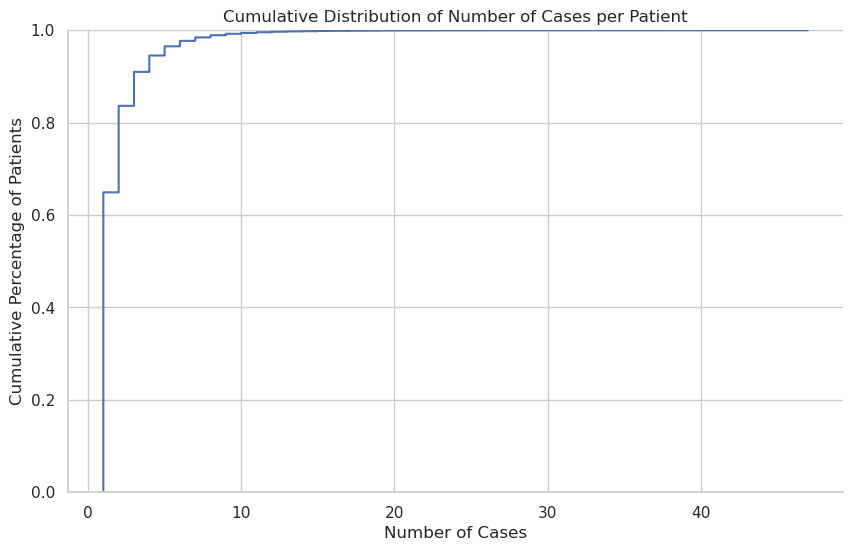

In [13]:
# Cumulative distribution plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(case_counts)
sns.despine()
plt.title('Cumulative Distribution of Number of Cases per Patient')
plt.xlabel('Number of Cases')
plt.ylabel('Cumulative Percentage of Patients')
plt.show()

# 3. Diagnosis

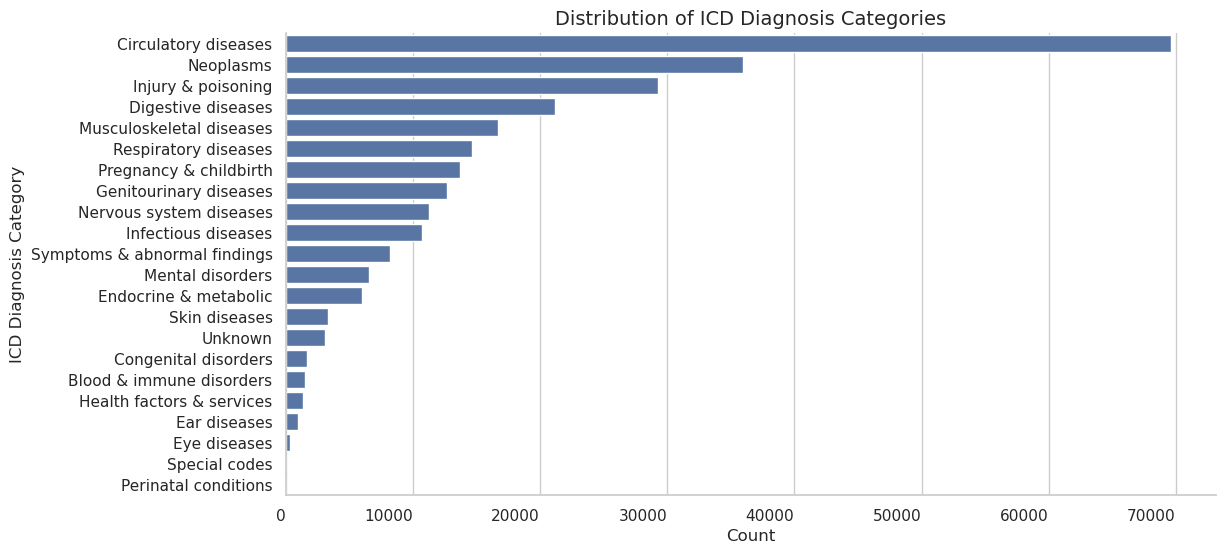

In [14]:
# Count occurrences of each diagnosis category
category_counts = merged_data['diagnosis_category'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
sns.despine()
plt.xlabel("Count", fontsize=12, fontweight="normal")
plt.ylabel("ICD Diagnosis Category", fontsize=12, fontweight="normal")
plt.title("Distribution of ICD Diagnosis Categories", fontsize=14, fontweight="medium")
plt.xticks(rotation=0, ha="right")

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

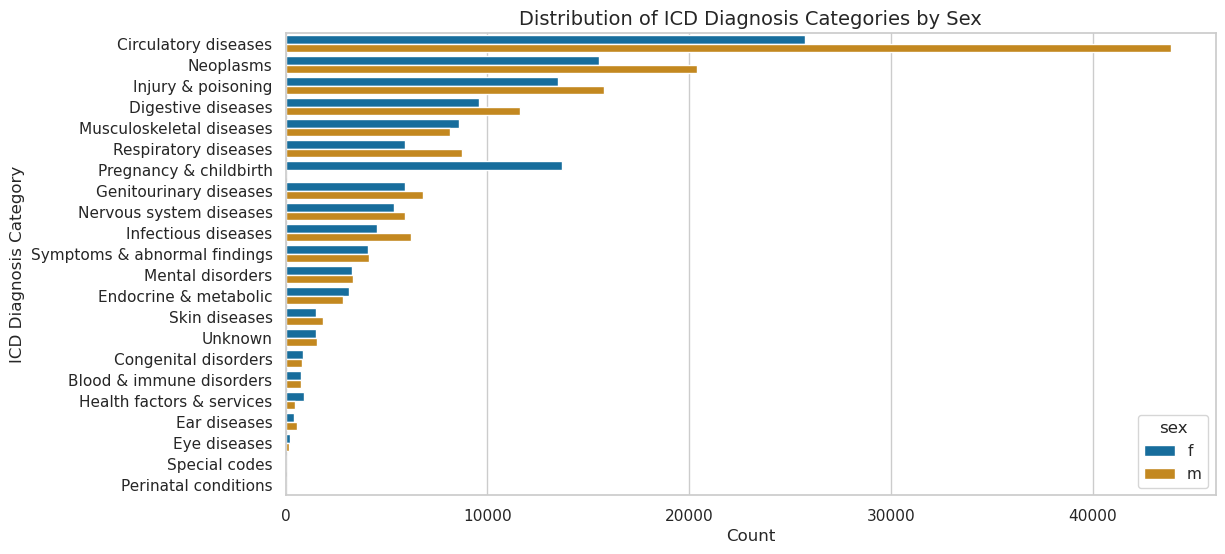

In [15]:
# Count occurrences of each diagnosis category by sex
category_sex_counts = merged_data.groupby(["sex", "diagnosis_category"]).size().unstack(fill_value=0)

# Sort by the total count of each diagnosis category to maintain order as in the second plot
category_order = category_sex_counts.sum(axis=0).sort_values(ascending=False).index
sns.set_palette("colorblind")
sns.despine()
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='diagnosis_category', hue='sex', data=category_sex_counts.reset_index().melt(id_vars="sex", value_name="count", var_name="diagnosis_category"),
            order=category_order)
plt.xlabel("Count", fontsize=12, fontweight="normal")
plt.ylabel("ICD Diagnosis Category", fontsize=12, fontweight="normal")
plt.title("Distribution of ICD Diagnosis Categories by Sex", fontsize=14, fontweight="medium")
plt.show()

## 4. Discharge type and relation with LOS and diagnosis


Note: For the modeling step, only the following discharge types will be retained:

- Entlassung → Discharge
- Entl.ext.Instit → Discharge to another institution
- Entl. in ex.KH → Discharge to another hospital
- Verstorben → Deceased

### 4.1 Distribution of discharge type

In [16]:
# Mapping of discharge types from German to English
discharge_translation = {
    "Entlassung": "Discharge",
    "Entl.ext.Instit": "Discharge to another institution",
    "Entl. in ex.KH": "Discharge to another hospital",
    "Verstorben": "Deceased",
    "Entl. Tarifbere": "Discharge tariff status",
    "Entl.eigner Wun": "Discharge on patient’s own request",
    "Wartepat. Entl.": "Discharge of a waiting patient",
    "Ambulanz exInst": "Ambulance to external institution",
    "Rückv n. ambBeh": "Transfer back from another institution",
    "Besuch Krankh.": "Visit to the hospital"
}

# Create discharge counts DataFrame with the translation column
discharge_counts = merged_data['discharge_type'].value_counts().reset_index()
discharge_counts.columns = ['discharge_type', 'Count']
discharge_counts['Percentage (%)'] = (discharge_counts['Count'] / discharge_counts['Count'].sum()) * 100
discharge_counts['discharge_type_translated'] = discharge_counts['discharge_type'].map(discharge_translation)

# Sort by Count (most to least frequent)
discharge_counts = discharge_counts.sort_values(by='Count', ascending=False)

# Display the discharge counts DataFrame with translations
display(discharge_counts)

# Now, translate the discharge type column in merged_data
merged_data['discharge_type'] = merged_data['discharge_type'].map(discharge_translation)


,discharge_type,Count,Percentage (%),discharge_type_translated
0,Entlassung,193161,71.865571,Discharge
1,Entl.ext.Instit,31821,11.839006,Discharge to another institution
2,Entl. in ex.KH,31771,11.820404,Discharge to another hospital
3,Verstorben,6836,2.543335,Deceased
4,Entl. Tarifbere,3367,1.252693,Discharge tariff status
5,Entl.eigner Wun,1704,0.633973,Discharge on patient’s own request
6,Wartepat. Entl.,96,0.035717,Discharge of a waiting patient
7,Ambulanz exInst,20,0.007441,Ambulance to external institution
8,Rückv n. ambBeh,3,0.001116,Transfer back from another institution
9,Besuch Krankh.,2,0.000744,Visit to the hospital


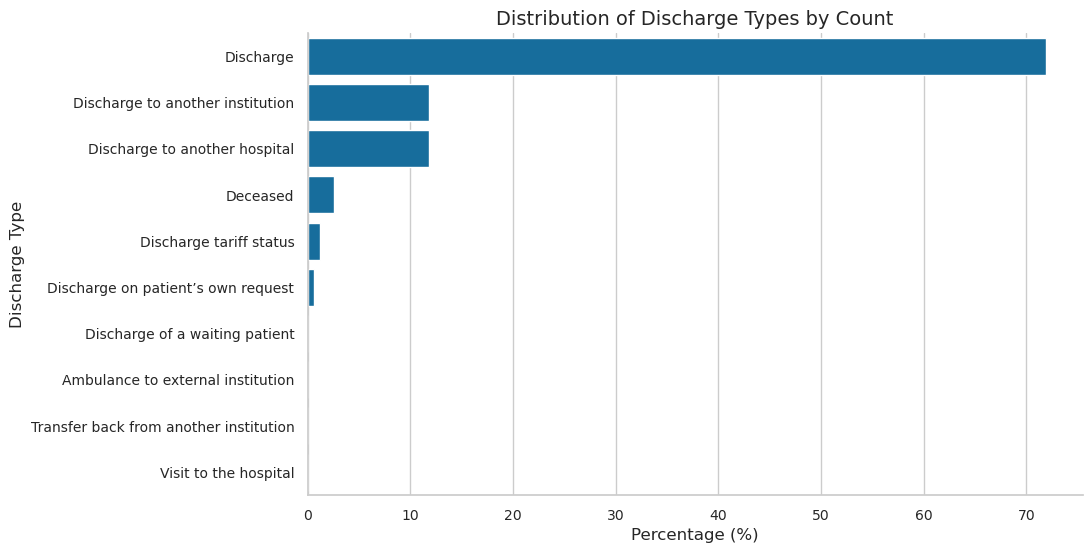

In [17]:
# Plot the distribution of Discharge Type counts (sorted)
plt.figure(figsize=(10, 6))
sns.barplot(y='discharge_type_translated', x='Percentage (%)', data=discharge_counts)
plt.title('Distribution of Discharge Types by Count', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Discharge Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()
plt.show()

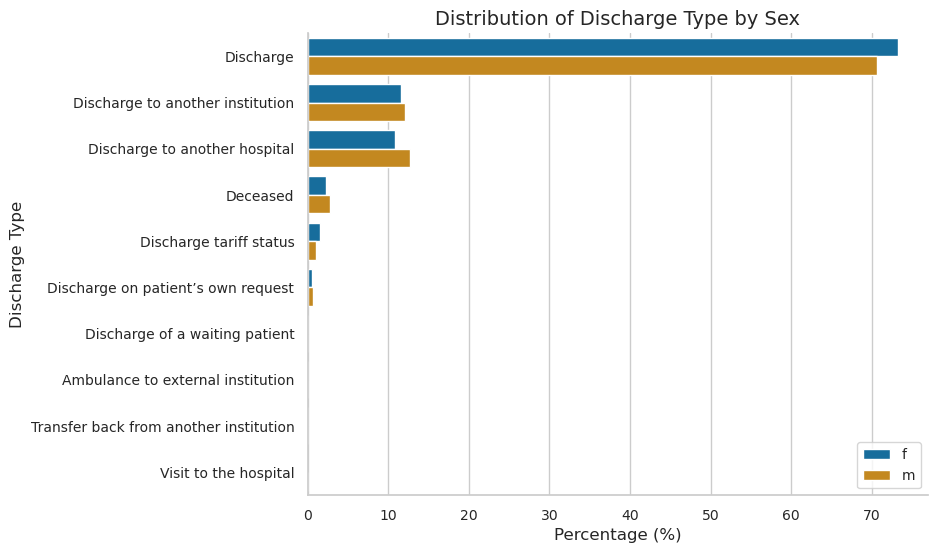

In [18]:
# Calculate the count of each discharge type by sex
discharge_counts_by_sex = merged_data.groupby(['sex', 'discharge_type']).size().reset_index(name='count')
# Calculate the total count of each sex group
total_counts_by_sex = discharge_counts_by_sex.groupby('sex')['count'].transform('sum')
# Compute the percentage for each discharge type within each sex group
discharge_counts_by_sex['percentage'] = (discharge_counts_by_sex['count'] / total_counts_by_sex) * 100
# Sort discharge types by the total count
discharge_type_order = discharge_counts_by_sex.groupby('discharge_type')['count'].sum().sort_values(ascending=False).index

# Plot the distribution of discharge type by sex, sorted by frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='percentage', y='discharge_type', hue='sex', data=discharge_counts_by_sex, palette='colorblind', order=discharge_type_order)
plt.title('Distribution of Discharge Type by Sex', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Discharge Type', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='lower right', fontsize=10)
sns.despine()
plt.show()

### 4.2 LOS vs discharge type

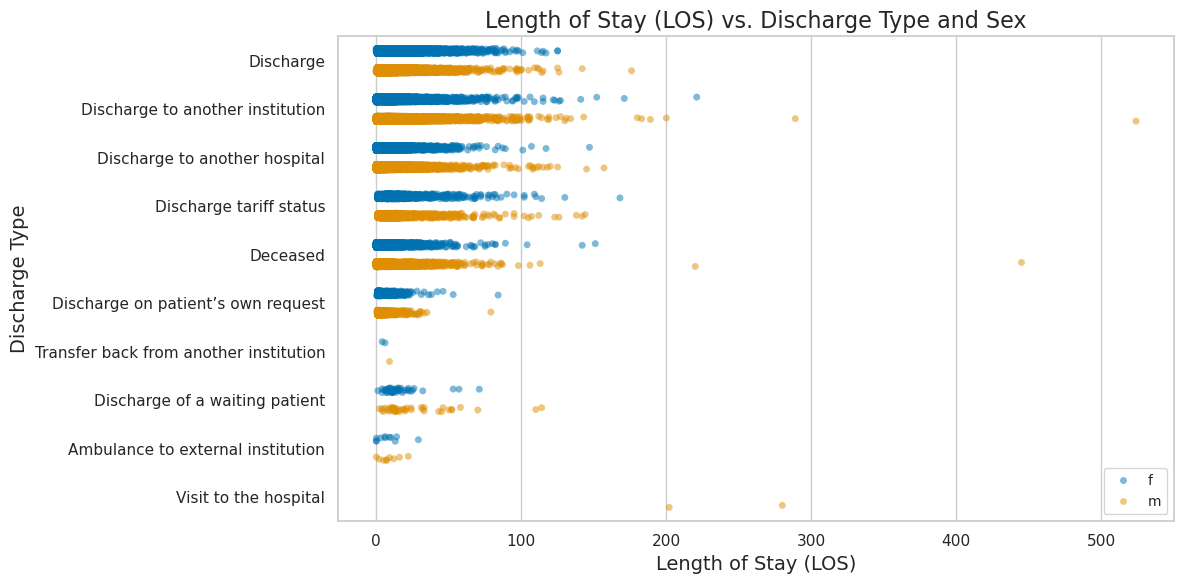

In [19]:
plt.figure(figsize=(12, 6))
sns.stripplot(y='discharge_type', x='length_of_stay_days', hue='sex', data=merged_data, jitter=True, palette='colorblind', dodge=True, alpha=0.5)
plt.title('Length of Stay (LOS) vs. Discharge Type and Sex', fontsize=16)
plt.ylabel('Discharge Type', fontsize=14)
plt.xlabel('Length of Stay (LOS)', fontsize=14)
#plt.xlim(0, 200)
plt.tight_layout()
plt.legend(loc='lower right', fontsize=10)
plt.show()

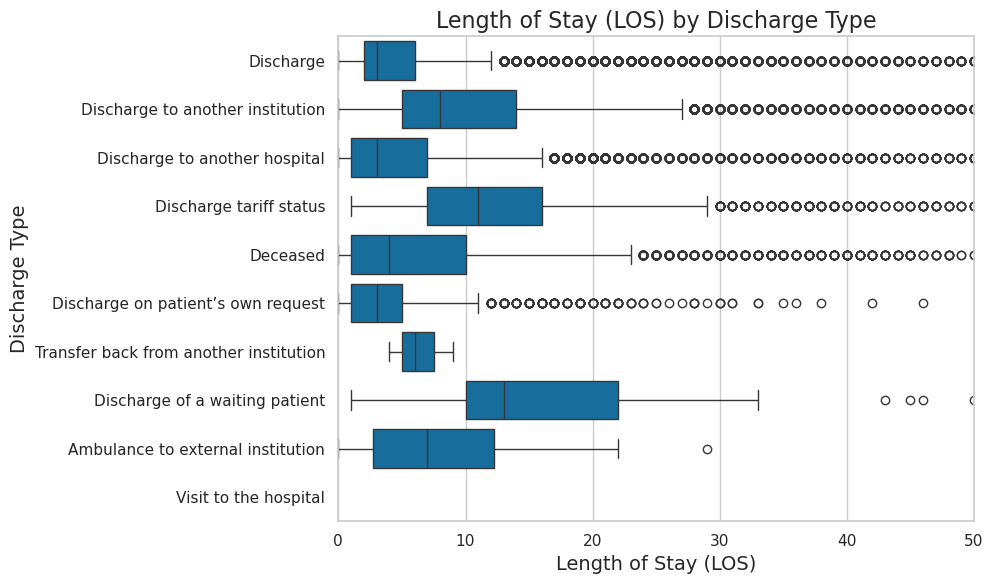

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='discharge_type', x='length_of_stay_days', data=merged_data)
#sns.despine()
plt.title('Length of Stay (LOS) by Discharge Type', fontsize=16)
plt.ylabel('Discharge Type', fontsize=14)
plt.xlabel('Length of Stay (LOS)', fontsize=14)
plt.tight_layout()
plt.xlim(0, 50) # By limiting the x-axis to 50, we focus on the main range of LOS, excluding extreme values for a clearer comparison.
plt.show()

## 5. LOS in relation with diagnosis cateogry and age

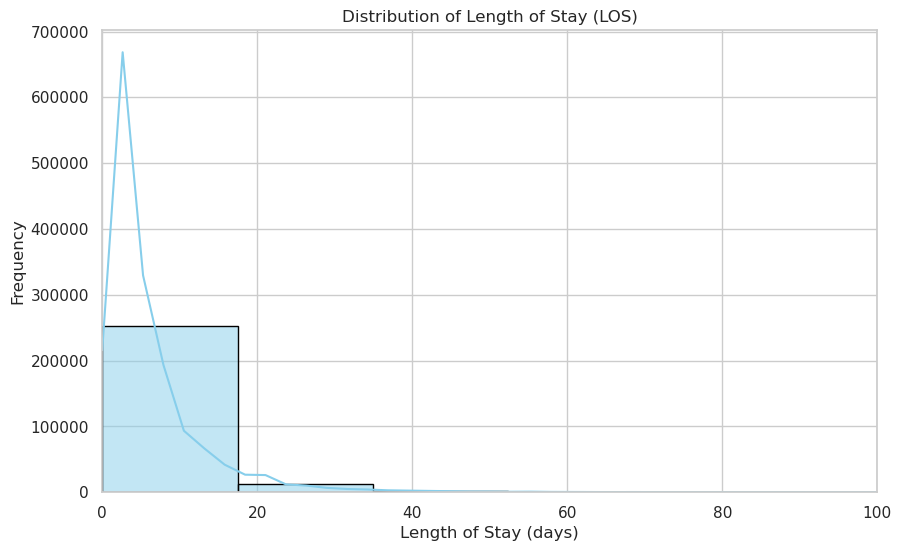

In [21]:
# Plot the distribution of length_of_stay
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['length_of_stay_days'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of Stay (LOS)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

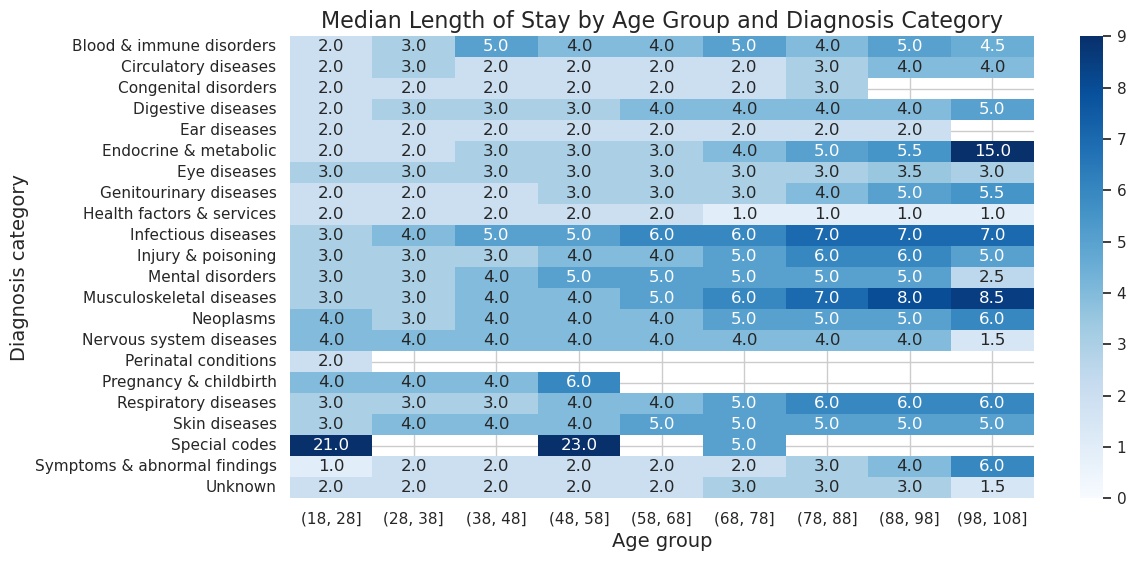

In [22]:
# Heatmap to visualize the median length of stay (LOS) for patients across different diagnosis categories and age groups.

merged_data['age_group'] = pd.cut(merged_data['age'], bins=np.arange(18, 110, 10))  # Create age groups
pivot_table = merged_data.pivot_table(index='diagnosis_category', columns='age_group', values='length_of_stay_days', aggfunc='median', observed=False)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="Blues", annot=True, fmt=".1f", vmin=0, vmax=9)
plt.title('Median Length of Stay by Age Group and Diagnosis Category', fontsize=16)
plt.xlabel('Age group', fontsize=14)
plt.ylabel('Diagnosis category', fontsize=14)
plt.show()

## 6. Summary statistics of laboratory test results

In [30]:
# Calculate missing percentage for each lab test
missing_percentage = merged_data.isnull().mean() * 100

# Add missing percentage to the summary statistics table
summary_stats = merged_data.describe().T
summary_stats['missing_percentage'] = missing_percentage

# Display the updated summary statistics table
summary_stats[4:].sort_values('missing_percentage')

,count,mean,std,min,25%,50%,75%,max,missing_percentage
KA,246422.0,4.029396,0.526045,1.20,3.70,4.00,4.300,34.10,8.318668
Leukn,241139.0,9.117285,6.532079,0.00,6.24,8.07,10.700,712.00,10.284209
THZn,241128.0,235.961149,95.359648,0.00,180.00,225.00,278.000,3458.00,10.288302
MCHCn,241127.0,341.032398,13.299970,87.00,333.00,342.00,350.000,404.00,10.288674
MCHn,241126.0,30.015432,2.368148,5.00,29.00,30.00,31.000,51.00,10.289046
MCVn,241126.0,87.957151,5.922553,48.00,84.00,88.00,91.000,172.00,10.289046
Hbn,241112.0,125.115896,22.168172,1.00,112.00,127.00,141.000,298.00,10.294254
Eryn,241111.0,4.182371,0.752223,0.02,3.73,4.25,4.690,10.05,10.294626
Hkn,241108.0,0.366510,0.062457,0.01,0.33,0.37,0.410,4.20,10.295743
RDWn,240903.0,14.004517,2.029728,0.10,12.80,13.40,14.600,43.20,10.372013
